In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501 (2).xlsx


In [26]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [27]:
# 시간 데이터로 변환 (Pump-Begin 기준)
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])

In [28]:
# 음수값 전처리
df['Conc(ug/m3)'] = df['Conc(ug/m3)'].apply(lambda x: x if x >= 0 else None)

In [29]:
# 날짜 컬럼 생성 (datetime을 date로 변환)
df['Date'] = df['Pump-Begin'].dt.date

# 날짜 분할 (11일 단위)
unique_dates = sorted(df['Date'].unique())
chunks = [unique_dates[i:i+11] for i in range(0, len(unique_dates), 11)]

In [30]:
# PM2.5 Y축 최대값
pm25_ymax = df[df['Conc(ug/m3)'].notna()]['Conc(ug/m3)'].max() * 1.1

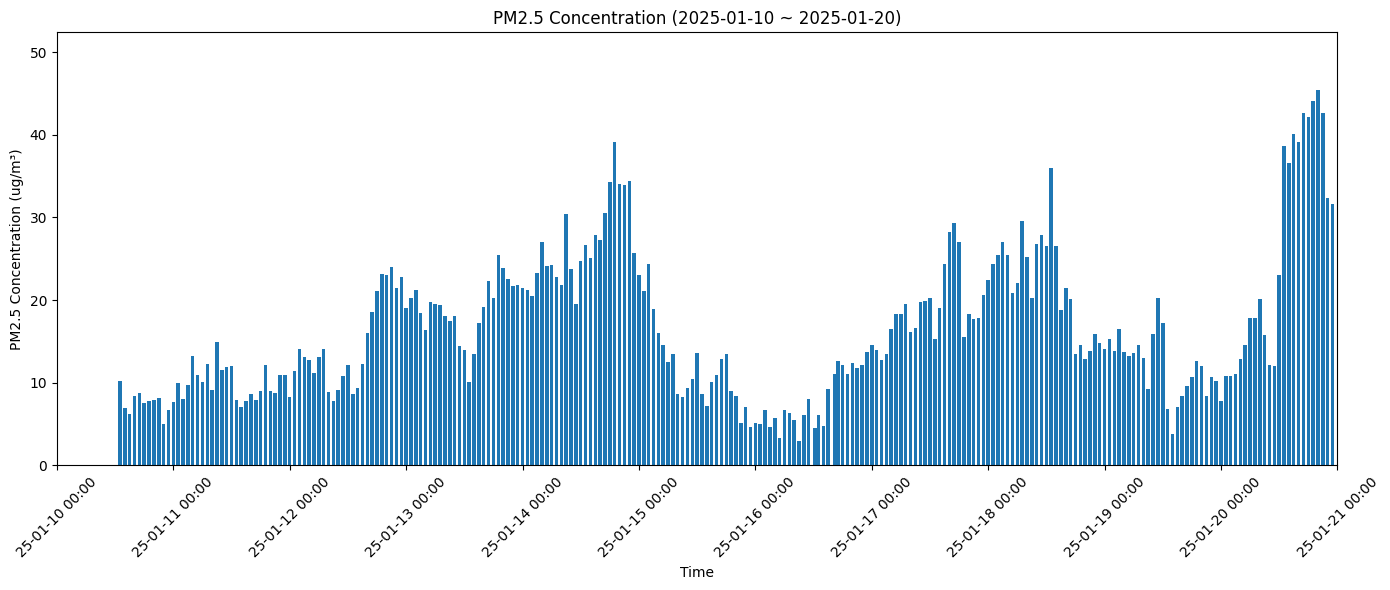

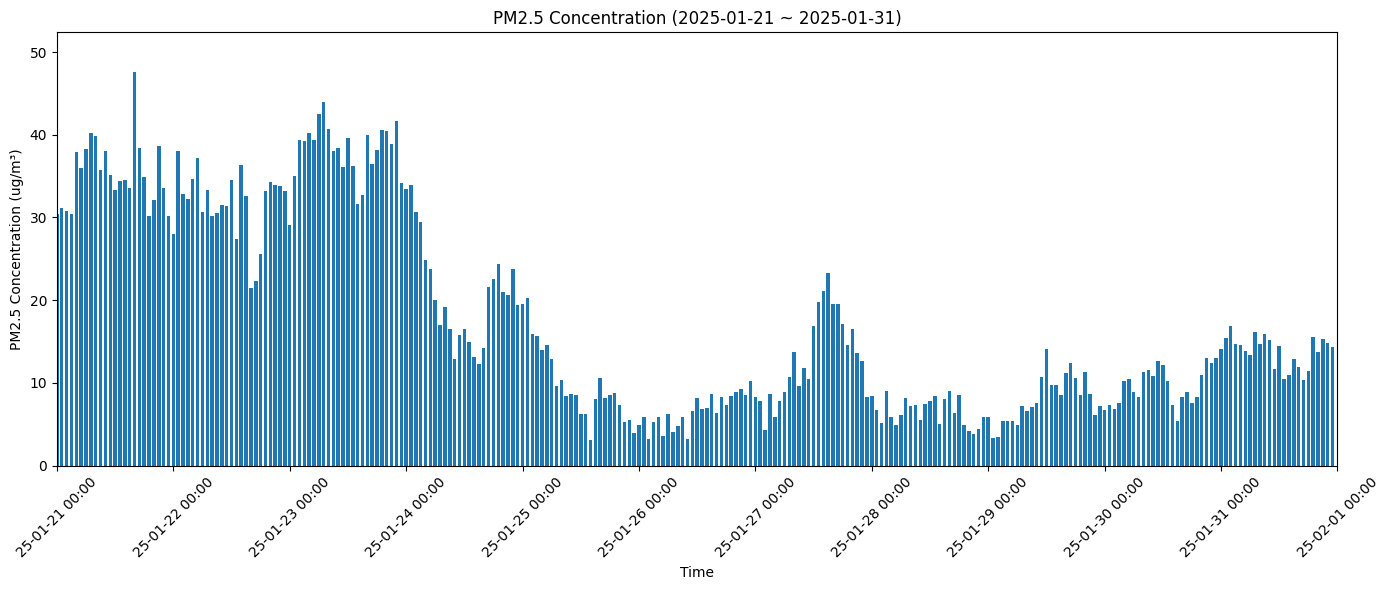

In [33]:
# PM2.5 질량농도 막대그래프 생성 (11일 단위)
for idx, date_group in enumerate(chunks, start=1):
    start_date = pd.to_datetime(min(date_group))
    end_date = pd.to_datetime(max(date_group)) + pd.Timedelta(days=1)

    temp_df = df[df['Date'].isin(pd.to_datetime(date_group).date)]
    temp_df = temp_df[(temp_df['Pump-Begin'] >= start_date) & (temp_df['Pump-Begin'] < end_date)]

    # 막대그래프 그리기
    plt.figure(figsize=(14, 6))
    plt.bar(temp_df['Pump-Begin'], temp_df['Conc(ug/m3)'], width=0.03)

    # 그래프 기본 설정
    plt.title(f'PM2.5 Concentration ({start_date.date()} ~ {(end_date - pd.Timedelta(days=1)).date()})')
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Concentration (ug/m³)')

    # x축 설정 : 가독성 위해 하루 단위로 표시, 데이터는 1시간 단위
    plt.xlim(start_date, end_date)
    plt.ylim(0, pm25_ymax)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
    plt.xticks(rotation=45)

    # 그래프 출력
    plt.tight_layout()
    plt.show()